# **Assignment 15: Loan Default Prediction**
# **(Afnan Madi) **

In [1]:
#1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#2. LOAD DATA
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving bank-loan.csv to bank-loan.csv


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


              age          ed      employ     address      income     debtinc  \
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000   
mean     0.412778    1.722857    0.270599    0.243487    0.073151    0.241090   
std      0.222148    0.928206    0.214775    0.200732    0.085218    0.166925   
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.250000    1.000000    0.096774    0.088235    0.023148    0.112469   
50%      0.388889    1.000000    0.225806    0.205882    0.046296    0.200489   
75%      0.555556    2.000000    0.387097    0.352941    0.094907    0.335575   
max      1.000000    5.000000    1.000000    1.000000    1.000000    1.000000   

         creddebt     othdebt     default   totaldebt  
count  700.000000  700.000000  700.000000  700.000000  
mean     0.075031    0.111628    0.261429    0.113582  
std      0.103029    0.121815    0.439727    0.125547  
min      0.000000    0.000000    0.000000    0

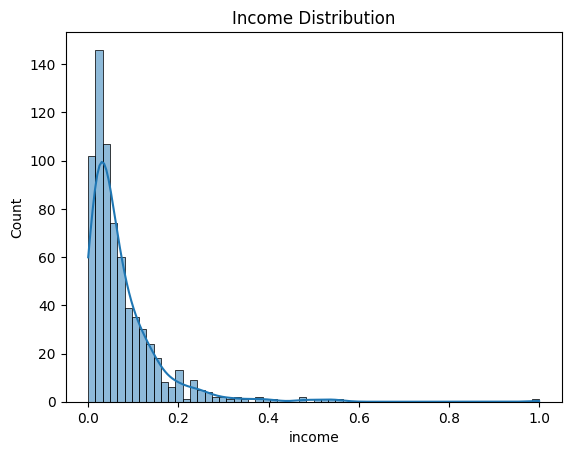

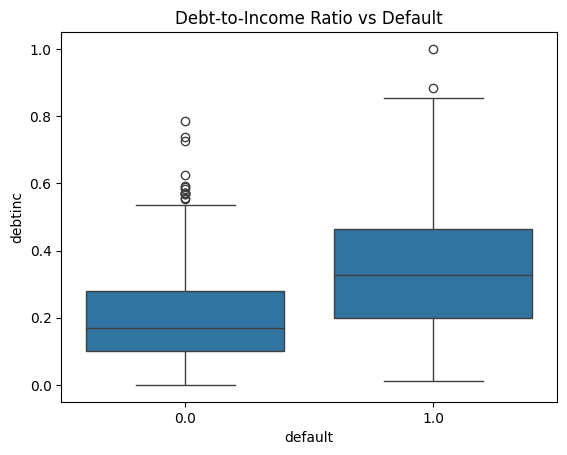

In [10]:
# 3. DATA CLEANING
# Summary statistics
print(df.describe())

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Visualizations
sns.histplot(data=df, x='income', kde=True)
plt.title("Income Distribution")
plt.show()

sns.boxplot(data=df, x='default', y='debtinc')
plt.title("Debt-to-Income Ratio vs Default")
plt.show()

# Drop rows with missing target
df = df.dropna(subset=['default'])

# Normalize numeric features
scaler = MinMaxScaler()
to_scale = ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']
df[to_scale] = scaler.fit_transform(df[to_scale])

In [12]:
#4. FEATURE ENGINEERING
# Create total debt feature
df['totaldebt'] = df['creddebt'] + df['othdebt']
df['totaldebt'] = scaler.fit_transform(df[['totaldebt']])

In [13]:
#5. MODEL BUILDING
X = df.drop(columns=['default'])
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 0.8

Confusion Matrix:
 [[96  6]
 [22 16]]


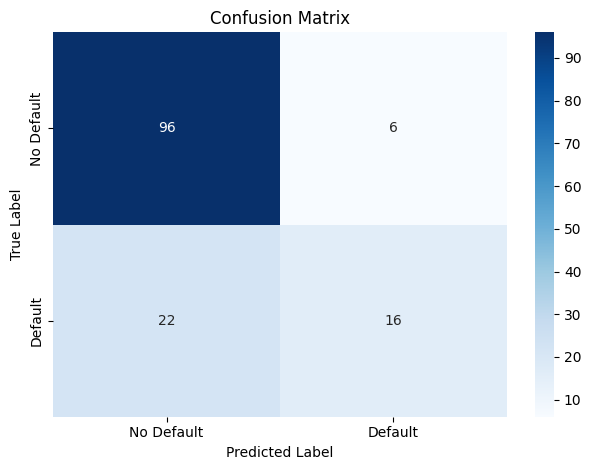


Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       102
         1.0       0.73      0.42      0.53        38

    accuracy                           0.80       140
   macro avg       0.77      0.68      0.70       140
weighted avg       0.79      0.80      0.78       140



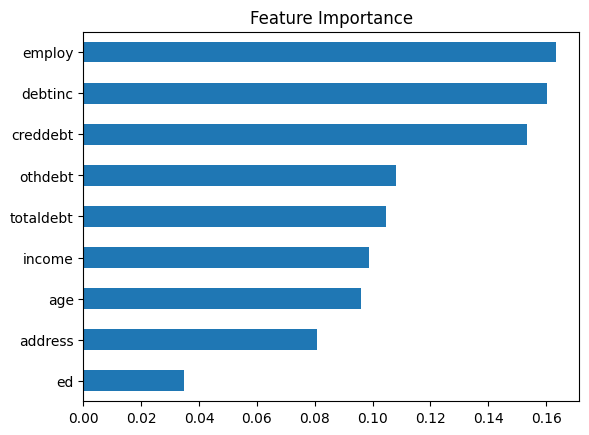

In [17]:
#6. MODEL EVALUATION
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Print accuracy and metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Plot confusion matrix as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax,
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()


    Actual Default Rate  Predicted Default Rate
ed                                             
1              0.215190                0.113924
2              0.342105                0.210526
3              0.277778                0.222222
4              0.600000                0.200000


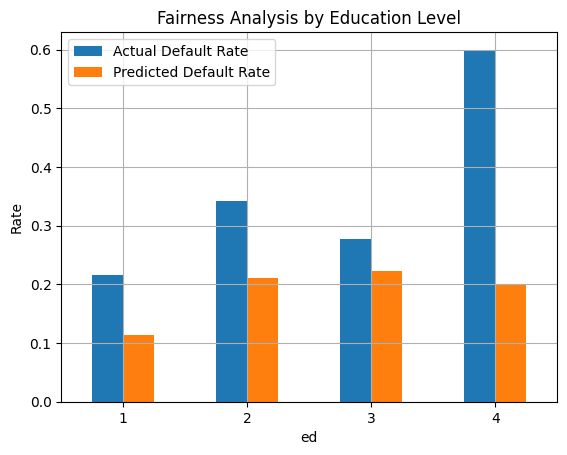

In [15]:
#7. FAIRNESS ANALYSIS
X_test_copy = X_test.copy()
X_test_copy['actual'] = y_test
X_test_copy['predicted'] = y_pred
X_test_copy['ed'] = df.loc[X_test_copy.index, 'ed']

# Fairness check by education level
fairness = X_test_copy.groupby('ed')[['actual', 'predicted']].mean()
fairness.columns = ['Actual Default Rate', 'Predicted Default Rate']
print(fairness)

fairness.plot(kind='bar', title="Fairness Analysis by Education Level")
plt.ylabel("Rate")
plt.grid(True)
plt.xticks(rotation=0)
plt.show()